# Findings:
1. Metadata_df 
    - Length: 1706 rows. 
    - Each row corresponds to a diagnostic slide.
    - Based on case ID there are many slide immages per case, as many as 17
2. Clinical_df  
    - Length : 882 rows.
    - Each row appears to corespond to a case.  
    - Row 827 has no information provided (file_id: 97ffa63a-a2a0-4241-a088-5c8820aed0c3)
    - Row 410 is missing the "days_to_birth" field
3. Combination Notes:
    - Case ID associated with row 827 which was dropped is not there, therefore a row gets dropped when joining dataframes.  
4. Final Takeaways:
    - Columns with little to no information: (dropping these)
        - annotations
        - exposures_alcohol_intensity
        - exposures_created_datetime
        - exposures_bmi
        - exposures_height
        - exposures_weight
        - exposures_cigarettes_per_day
        - exposures_years_smoked
        - diagnoses_days_to_recurrence
        - diagnoses_created_datetime
        - diagnoses_days_to_last_known_disease_status
        - demographic_created_datetime
        - demographic_year_of_death
    - If we are going to do JUST image classification we want a dataframe with the following columns:
        - case_id
        - file_id
        - diagnoses_primary_diagnosis

# Imports:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EDA Inital

In [2]:
clinical_eda = pd.read_json('../data/clinical.cart.2020-05-20.json')
metadata_eda = pd.read_json('../data/metadata.cart.2020-05-20.json')

In [3]:
clinical_eda.shape

(882, 4)

In [4]:
metadata_eda.shape

(1706, 13)

In [5]:
clinical_eda.isnull().sum()

case_id        0
exposures      1
demographic    1
diagnoses      1
dtype: int64

In [6]:
clinical_eda.loc[clinical_eda['exposures'].isnull()]

,case_id,exposures,demographic,diagnoses
827,bc66f21c-7ae6-4312-b6c1-ea3e19f90485,NaN,NaN,NaN


In [7]:
metadata_eda.isnull().sum()

data_format                 0
file_name                   0
submitter_id                0
data_type                   0
data_category               0
file_size                   0
experimental_strategy       0
state                       0
md5sum                      0
file_id                     0
associated_entities         0
access                      0
annotations              1578
dtype: int64

# Metadata JSON File

In [8]:
# Reload Data and start fresh. 
metadata_df = pd.read_json('../data/metadata.cart.2020-05-20.json')
metadata_df.head(1)

,data_format,file_name,submitter_id,data_type,data_category,file_size,experimental_strategy,state,md5sum,file_id,associated_entities,access,annotations
0,SVS,TCGA-HT-7882-01Z-00-DX4.8B139B5B-567F-4810-A03...,TCGA-HT-7882-01Z-00-DX4_slide_image,Slide Image,Biospecimen,561683973,Diagnostic Slide,released,c0e80354a9364a9ab0f31e6c5f51a248,5df8c657-36b5-410e-a116-cb1f4db29ec7,"[{'entity_type': 'slide', 'case_id': '912d6455...",open,NaN


In [9]:
# Unpacking associated_entities Dictionary:
for key in metadata_df['associated_entities'][0][0].keys():
    metadata_df[key] = [value[0][key] for value in metadata_df['associated_entities']]

metadata_df.head()

,data_format,file_name,submitter_id,data_type,data_category,file_size,experimental_strategy,state,md5sum,file_id,associated_entities,access,annotations,entity_type,case_id,entity_id,entity_submitter_id
0,SVS,TCGA-HT-7882-01Z-00-DX4.8B139B5B-567F-4810-A03...,TCGA-HT-7882-01Z-00-DX4_slide_image,Slide Image,Biospecimen,561683973,Diagnostic Slide,released,c0e80354a9364a9ab0f31e6c5f51a248,5df8c657-36b5-410e-a116-cb1f4db29ec7,"[{'entity_type': 'slide', 'case_id': '912d6455...",open,NaN,slide,912d6455-0a50-4fde-b785-f6c09b00b7e4,14d2d3db-28e2-4bd7-b5a8-e1074d50d3b8,TCGA-HT-7882-01Z-00-DX4
1,SVS,TCGA-HT-7482-01Z-00-DX4.5B6C52B2-6DE5-46CC-B8C...,TCGA-HT-7482-01Z-00-DX4_slide_image,Slide Image,Biospecimen,126657109,Diagnostic Slide,released,6e72698613fbc225bd18ea7b1ade9a0b,a710baaa-cfce-470b-ba93-b7a2a69f4de1,"[{'entity_type': 'slide', 'case_id': '448d3e3b...",open,NaN,slide,448d3e3b-622c-4e79-bb1d-b5f2e92970e8,0d8eda9f-377b-4f0b-a47a-beb2611ab03d,TCGA-HT-7482-01Z-00-DX4
2,SVS,TCGA-DH-A66B-01Z-00-DX1.8669A577-0481-4C15-B4C...,TCGA-DH-A66B-01Z-00-DX1_slide_image,Slide Image,Biospecimen,1300303345,Diagnostic Slide,released,a26117dc26f87c24dfad0e3a3d5b9bdc,3adc47cf-8b21-4b2b-9684-534451e91322,"[{'entity_type': 'slide', 'case_id': 'cb1e9916...",open,NaN,slide,cb1e9916-c03f-405a-a797-15823df09c8e,408f0a8c-d873-43a8-b5b7-749f3149ccbd,TCGA-DH-A66B-01Z-00-DX1
3,SVS,TCGA-DB-A64Q-01Z-00-DX1.CD3937C2-015A-490D-B6A...,TCGA-DB-A64Q-01Z-00-DX1_slide_image,Slide Image,Biospecimen,1789132612,Diagnostic Slide,released,65a1f745caab665311d1bb5d7d53dcc4,5a6aa6a1-556c-4481-ac06-3f2feb853296,"[{'entity_type': 'slide', 'case_id': '887def39...",open,NaN,slide,887def39-e212-490d-8849-2bc932fceff0,9bb20abd-0256-45f3-ac18-c1ab73044f31,TCGA-DB-A64Q-01Z-00-DX1
4,SVS,TCGA-R8-A6MK-01Z-00-DXB.F02C56E8-9793-4272-B14...,TCGA-R8-A6MK-01Z-00-DXB_slide_image,Slide Image,Biospecimen,2156870006,Diagnostic Slide,released,a22a4a3fb637fb48a6c588f2157b724b,9ad09160-2a74-4307-ad23-97aec076aa2d,"[{'entity_type': 'slide', 'case_id': '65836b59...",open,NaN,slide,65836b59-b469-4b89-adf5-e65735e494f5,b930e2d7-b22d-4fd3-a856-a8a7d1af0748,TCGA-R8-A6MK-01Z-00-DXB


# Clinical JSON File:

In [10]:
# Reload Data and start fresh. 
clinical_df = pd.read_json('../data/clinical.cart.2020-05-20.json')
clinical_df.dropna(inplace=True) # drop row 827 with no info
clinical_df.head(1)

,case_id,exposures,demographic,diagnoses
0,106709ec-72df-44f0-8c71-87b7c755f8f0,"[{'state': 'released', 'alcohol_history': 'Not...","{'state': 'released', 'updated_datetime': '201...","[{'state': 'released', 'days_to_recurrence': N..."


In [11]:
# Unpacking Dictionaries:
for col in ['exposures','diagnoses']:
#     print('****',col)
    for key in clinical_df[col][0][0].keys():
        clinical_df[f'{col}_{key}'] = [value[0][key] for value in clinical_df[col]]

In [12]:

clinical_df['diagnoses_primary_diagnosis'].value_counts()

Glioblastoma                                      389
Mixed glioma                                      130
Astrocytoma, anaplastic                           122
Oligodendroglioma, NOS                            107
Oligodendroglioma, anaplastic                      72
Astrocytoma, NOS                                   59
Malignant lymphoma, large B-cell, diffuse, NOS      2
Name: diagnoses_primary_diagnosis, dtype: int64

In [13]:
# Demographic loaded in not as a list. So we have one less 'layer' to unpack
for key in clinical_df['demographic'][0].keys():
    for i , value in enumerate(clinical_df['demographic']):
        try:
            clinical_df[f'demographic_{key}'] = value[key]
        except:
            clinical_df[f'demographic_{key}'] = np.NaN
            print(f'Encountered Missing value at {key} index {i}')

Encountered Missing value at days_to_birth index 410


# Combining Dataframes

In [14]:
clinical_df.head(1)

,case_id,exposures,demographic,diagnoses,exposures_state,exposures_alcohol_history,exposures_alcohol_intensity,exposures_created_datetime,exposures_bmi,exposures_height,...,demographic_created_datetime,demographic_demographic_id,demographic_days_to_birth,demographic_year_of_death,demographic_submitter_id,demographic_ethnicity,demographic_gender,demographic_race,demographic_vital_status,demographic_year_of_birth
0,106709ec-72df-44f0-8c71-87b7c755f8f0,"[{'state': 'released', 'alcohol_history': 'Not...","{'state': 'released', 'updated_datetime': '201...","[{'state': 'released', 'days_to_recurrence': N...",released,Not Reported,None,None,NaN,NaN,...,None,f808c090-8635-5305-8228-ef9f45138b8f,-13222,None,TCGA-HT-A616_demographic,not hispanic or latino,female,white,Alive,1977


In [15]:
metadata_df.head(1)

,data_format,file_name,submitter_id,data_type,data_category,file_size,experimental_strategy,state,md5sum,file_id,associated_entities,access,annotations,entity_type,case_id,entity_id,entity_submitter_id
0,SVS,TCGA-HT-7882-01Z-00-DX4.8B139B5B-567F-4810-A03...,TCGA-HT-7882-01Z-00-DX4_slide_image,Slide Image,Biospecimen,561683973,Diagnostic Slide,released,c0e80354a9364a9ab0f31e6c5f51a248,5df8c657-36b5-410e-a116-cb1f4db29ec7,"[{'entity_type': 'slide', 'case_id': '912d6455...",open,NaN,slide,912d6455-0a50-4fde-b785-f6c09b00b7e4,14d2d3db-28e2-4bd7-b5a8-e1074d50d3b8,TCGA-HT-7882-01Z-00-DX4


In [16]:
metadata_df.shape

(1706, 17)

In [17]:
df = metadata_df.merge(clinical_df, left_on = 'case_id', right_on = 'case_id')

In [18]:
df.shape

(1705, 70)

In [19]:
# df.columns

In [20]:
basic_df = df[['file_name', 'file_id', 'case_id', 'diagnoses_primary_diagnosis']]

In [21]:
# metadata_df['file_id']

In [22]:
# basic_df['file_id']

In [23]:
# Figure out why we are getting 1705 rows instead of 1706
for file in metadata_df['file_id']:
    if file not in [value for value in basic_df['file_id']]:
        print(file)
        
# this dropped row is clinical_df row 827, which was removed because there was no clinical information

97ffa63a-a2a0-4241-a088-5c8820aed0c3


# Final EDA

In [24]:
df.shape

(1705, 70)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1705 entries, 0 to 1704
Data columns (total 70 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   data_format                                  1705 non-null   object 
 1   file_name                                    1705 non-null   object 
 2   submitter_id                                 1705 non-null   object 
 3   data_type                                    1705 non-null   object 
 4   data_category                                1705 non-null   object 
 5   file_size                                    1705 non-null   int64  
 6   experimental_strategy                        1705 non-null   object 
 7   state                                        1705 non-null   object 
 8   md5sum                                       1705 non-null   object 
 9   file_id                                      1705 non-null   object 
 10  

In [26]:
# Lets make our database with just case_id, file_id, file_name, primary diagnosis.
# This is just what we care about w/regard to just the image classifcation


classification_df = pd.DataFrame(df[['case_id', # case id
                            'file_id', # name of folder created with file in it
                            'file_name', # actual name of file
                            'diagnoses_primary_diagnosis' # 
                           ]])
classification_df.head(5)

,case_id,file_id,file_name,diagnoses_primary_diagnosis
0,912d6455-0a50-4fde-b785-f6c09b00b7e4,5df8c657-36b5-410e-a116-cb1f4db29ec7,TCGA-HT-7882-01Z-00-DX4.8B139B5B-567F-4810-A03...,"Oligodendroglioma, anaplastic"
1,912d6455-0a50-4fde-b785-f6c09b00b7e4,b3f00c7e-df0f-4321-be96-21153bffce41,TCGA-HT-7882-01Z-00-DX1.B5224DF8-94F3-47F3-99F...,"Oligodendroglioma, anaplastic"
2,912d6455-0a50-4fde-b785-f6c09b00b7e4,dc640c8c-e8ee-467a-871f-3785337ebd68,TCGA-HT-7882-01Z-00-DX3.E16AFAA3-F6A2-45D6-862...,"Oligodendroglioma, anaplastic"
3,912d6455-0a50-4fde-b785-f6c09b00b7e4,e85578a5-145f-41dc-b9db-6feef23597e9,TCGA-HT-7882-01Z-00-DX5.2F59EB36-9950-4136-821...,"Oligodendroglioma, anaplastic"
4,912d6455-0a50-4fde-b785-f6c09b00b7e4,8c2d7dd0-22bf-42c1-ac52-6005467ebc51,TCGA-HT-7882-01Z-00-DX2.8F391B3B-6995-4594-8E6...,"Oligodendroglioma, anaplastic"


In [27]:
classification_df['diagnoses_primary_diagnosis'].value_counts()

Glioblastoma                                      860
Mixed glioma                                      216
Oligodendroglioma, NOS                            204
Astrocytoma, anaplastic                           164
Oligodendroglioma, anaplastic                     155
Astrocytoma, NOS                                  104
Malignant lymphoma, large B-cell, diffuse, NOS      2
Name: diagnoses_primary_diagnosis, dtype: int64

In [28]:
classification_df['file_name'].value_counts() # shows all file names are unique

TCGA-06-0195-01Z-00-DX5.f0adc4a5-671d-4b0f-9ae1-de3869c199b3.svs    1
TCGA-HT-8108-01Z-00-DX1.995485CB-F5C0-445E-9217-009AFB322AF6.svs    1
TCGA-06-0201-01Z-00-DX2.0371aa1e-fb00-4aea-abe8-ceb12a9db04f.svs    1
TCGA-HT-A5R7-01Z-00-DX1.710C776B-5420-42E6-8D40-C5C36D1CA603.svs    1
TCGA-02-0006-01Z-00-DX2.f55eb13f-5816-4490-b2aa-675b20676e5c.svs    1
                                                                   ..
TCGA-TM-A84L-01Z-00-DX2.3C138376-4F7E-460C-B9FE-D0EBD323A66B.svs    1
TCGA-DB-5279-01Z-00-DX2.40EBC457-110D-408A-A40D-B51873A28818.svs    1
TCGA-TQ-A7RH-01Z-00-DX1.9B62CBC8-597B-4DDC-8129-37D8977D2171.svs    1
TCGA-HT-7601-01Z-00-DX1.F53B99B0-5123-41C1-9AB0-A0A786D6727F.svs    1
TCGA-19-0962-01Z-00-DX1.5e07aacc-4c4e-454f-8779-b35e654641e3.svs    1
Name: file_name, Length: 1705, dtype: int64

In [29]:
classification_df['file_id'].value_counts() # same with our file_ids

7bb37569-ce23-4406-99d0-981497a64098    1
480adf31-7575-4778-b543-d29ced69ae7f    1
3521ac05-a977-4177-b1a8-9d6163689c58    1
704663ae-552a-4ecb-a2eb-d446d45d2465    1
edb77199-3ba8-4ccb-8557-d042c138404b    1
                                       ..
e59c2c5e-70bc-47a0-a3e0-a2be4f1de221    1
024f4bd0-02aa-4d48-88d9-cbdea453adab    1
c06235d2-9a32-4b0c-8b26-e46d59161102    1
6980a407-cad4-4722-b107-08b0e5a61890    1
a5bb04b3-70a1-4e09-b97a-2629ee0906c2    1
Name: file_id, Length: 1705, dtype: int64

## Basic Visualizations:

In [30]:
(df['file_size'] / 1_000_000_000).mean()

0.8309593996105588

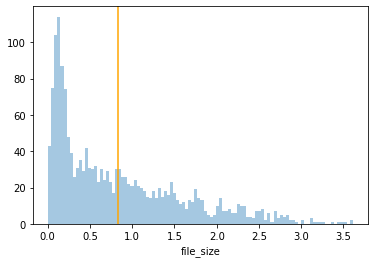

In [31]:
# Image Sizes:
ax = sns.distplot((df['file_size'] / 1_000_000_000), bins = 100, kde=False)
plt.axvline((df['file_size'] / 1_000_000_000).mean(), color = 'orange')

# Scrap Work

In [ ]:
clinical_df['demographic'][0].keys()

In [ ]:
for key in clinical_df['demographic'][0].keys():
    for i , value in enumerate(clinical_df['demographic']):
        try:
            clinical_df[f'demographic_{key}'] = value[key]
        except:
            clinical_df[f'demographic_{key}'] = np.NaN
            print(f'Encountered Missing value at {key} index {i}')